# Escalamiento

El escalamiento típicamente varia los resultados de manera significativa al utilizar ciertos algoritmos de aprendizaje de máquinas. Algunos algoritmos utilizan distancias entre puntos de datos para establecer sus cálculos y por esta razón es que los resultados se pueden sesgar al entrenar sobre conjuntos de datos en donde los rangos de las variables varian entre si. Exploraremos algunos métodos para escalar variables y veremos como afectan a un par de algoritmos de entrenamiento de modelos.

In [1]:
import numpy as np
import pandas as pd
import sklearn.preprocessing # Módulo donde están las  herramientas para el escalamiento de las variables
import sklearn.neighbors # Utilizaremos un regresor basado en KNN
import sklearn.tree # Métodos basados en árboles
import matplotlib.pyplot as plt
import seaborn as sns # Biblioteca de visualización programada sobre matplotlib

Resolveremos una tarea de regresión al predecir el valor de una propiedad desde algunos atributos de la misma.

In [2]:
real_estate = pd.read_csv("data/real_estate.csv", delimiter=";")

In [3]:
feature_names = [
    'transaction_date', 
    'house_age', 
    'distance_nearest_station', 
    'number_convenience_stores', 
    'latitude', 
    'longitude'
]

features = real_estate[feature_names]

In [4]:
label = real_estate.price_unit_area

## Datos crudos

Se puede observar que las distintas variables se encuentran en rangos muy distintos.

In [5]:
features.describe()

,transaction_date,house_age,distance_nearest_station,number_convenience_stores,latitude,longitude
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270


In [6]:
def plot_distribution(df,title):
    """
    Esta función recibe un dataframe de características y un titulo.
    Retorna un gráfico de violines para cada una de las características.
    """
    sns.violinplot(
        data=df.melt(), # Cambiamos el esquema del dataframe para que sea solo de 2 columnas
        y="variable",
        x="value",
        cut=0
    )
    plt.title(title)
    plt.show()

Con esta visualización podemos concluir que las variables sí se encuentran en distintos rangos.

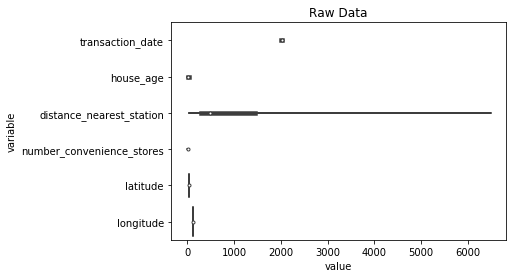

In [7]:
plot_distribution(features,"Raw Data")

## Normalización ( _Min-Max Scaling_ )

El resultado de la normalización son variables escaladas hacia un rango fijo entre 0 y 1, donde 0 es mapeado al valor más pequeño del conjunto de datos original y 1 al más grande.

La ecuación que representa este escalamiento es:

$$x_{norm} = \frac{x - x_{min}}{x_{max} - x_{min}}$$


In [8]:
def rescale_data(df,scaler):
    """
    Recibe un dataframe y un método de escalamiento de variables.
    Retorna un dataframe con las variables escaladas utilizando el método especificado.
    """
    if scaler != None:
        features_rescaled = scaler.fit_transform(features) # Transformamos los datos utilizando un método de escalamiento.
        return pd.DataFrame(features_rescaled,columns=feature_names)
    else:
        return df

In [9]:
features_mms = rescale_data(features,sklearn.preprocessing.MinMaxScaler())
features_mms.describe()

,transaction_date,house_age,distance_nearest_station,number_convenience_stores,latitude,longitude
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,0.526131,0.404396,0.164047,0.409420,0.447892,0.645149
std,0.307631,0.260102,0.195233,0.294556,0.150390,0.165486
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.272727,0.206050,0.041138,0.100000,0.374818,0.588257
50%,0.545455,0.367580,0.072525,0.400000,0.472976,0.701962
75%,0.818182,0.642694,0.221342,0.600000,0.549988,0.752372
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


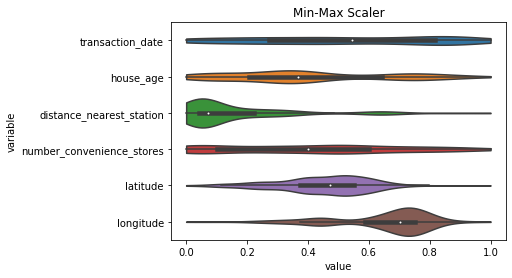

In [10]:
plot_distribution(features_mms,"Min-Max Scaler")

## Estandarización

En este tipo de escalamiento se retorna un grupo de variables mapeadas hacia una distribución normal de media 0 y desviación estandar 1. 

La ecuación que representa este escalamiento es:

$$x_{std} = \frac{x - x_{mean}}{x_{sd} }$$

In [11]:
features_ss = rescale_data(features,sklearn.preprocessing.StandardScaler())
features_ss.describe()

,transaction_date,house_age,distance_nearest_station,number_convenience_stores,latitude,longitude
count,4.140000e+02,4.140000e+02,4.140000e+02,4.140000e+02,4.140000e+02,4.140000e+02
mean,1.753750e-13,-6.704245e-17,-1.161175e-16,-1.072679e-18,9.345396e-14,-1.594378e-12
std,1.001210e+00,1.001210e+00,1.001210e+00,1.001210e+00,1.001210e+00,1.001210e+00
min,-1.712333e+00,-1.556639e+00,-8.412787e-01,-1.391638e+00,-2.981805e+00,-3.903223e+00
25%,-8.247207e-01,-7.634921e-01,-6.303115e-01,-1.051734e+00,-4.864845e-01,-3.441981e-01
50%,6.289152e-02,-1.417172e-01,-4.693493e-01,-3.202000e-02,1.669943e-01,3.437301e-01
75%,9.505038e-01,9.172774e-01,2.938267e-01,6.477891e-01,6.796928e-01,6.487148e-01
max,1.542243e+00,2.292652e+00,4.287008e+00,2.007407e+00,3.675611e+00,2.146891e+00


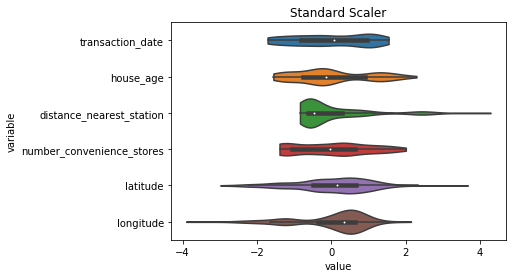

In [12]:
plot_distribution(features_ss,"Standard Scaler")

## _Robust Scaler_

Este tipo de escalamiento remueve la mediana de las variables y las escala de acuerdo al rango intercuartílico. Este método es muy robusto a la presencia de outliers.

In [13]:
features_rs = rescale_data(features,sklearn.preprocessing.RobustScaler())
features_rs.describe()

,transaction_date,house_age,distance_nearest_station,number_convenience_stores,latitude,longitude
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,-0.035427,0.084317,0.507878,0.018841,-0.143198,-0.346184
std,0.563991,0.595685,1.083398,0.589112,0.858540,1.008356
min,-1.000000,-0.841830,-0.402461,-0.800000,-2.700104,-4.277267
25%,-0.500000,-0.369935,-0.174176,-0.600000,-0.560360,-0.692838
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,0.630065,0.825824,0.400000,0.439640,0.307162
max,0.833332,1.448366,5.146803,1.200000,3.008648,1.816032


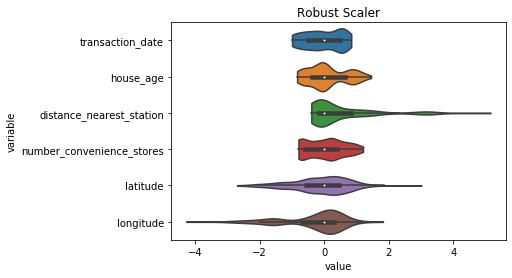

In [14]:
plot_distribution(features_rs,"Robust Scaler")

## Comparación

In [15]:
def fit_test(features,label,regressor):
    """
    Recibe un arreglo de características y de etiquetas junto con el método que se utilizará para regresión.
    Retornma el RMSE asociado al conjunto de prueba.
    """
    features_train, features_test, label_train, label_test = sklearn.model_selection.train_test_split( 
        features,
        label,
        test_size=0.30, 
        random_state = 11, 
    )
    regressor.fit(features_train, label_train)
    predictions = regressor.predict(features_test)
    return sklearn.metrics.mean_squared_error(label_test, predictions) ** 0.5

Declaramos una lista de algoritmos y escaladores a probar.

In [16]:
regressors = [
    sklearn.neighbors.KNeighborsRegressor(),
    sklearn.tree.DecisionTreeRegressor(random_state=11)
]

transformers = [
    None,
    sklearn.preprocessing.StandardScaler(),
    sklearn.preprocessing.MinMaxScaler(),
    sklearn.preprocessing.RobustScaler(),
]

Iteramos sobre cada una de las combinaciones y le extraemos el RMSE de cada combinación

In [17]:
results = []
for regressor in regressors:
    for transformer in transformers:
        transformed_features = rescale_data(features,transformer)
        result = fit_test(transformed_features,label,regressor)
        results.append(
            {
                "regressor":regressor.__class__.__name__,
                "transformer":transformer.__class__.__name__,
                "rmse":result
            }
        )
results = pd.DataFrame(results).sort_values(by="rmse")
results

,regressor,transformer,rmse
3,KNeighborsRegressor,RobustScaler,10.194979
1,KNeighborsRegressor,StandardScaler,10.647767
2,KNeighborsRegressor,MinMaxScaler,10.675315
0,KNeighborsRegressor,NoneType,10.717102
5,DecisionTreeRegressor,StandardScaler,11.012329
7,DecisionTreeRegressor,RobustScaler,11.012329
6,DecisionTreeRegressor,MinMaxScaler,11.015071
4,DecisionTreeRegressor,NoneType,11.033359


Resumimos los resultados (menos RMSE es mejor). Podemos concluir que el mejor método es el robust scaler y que el arbol de decisión no se ve afectado por las escalas de las variables.

(9, 12)

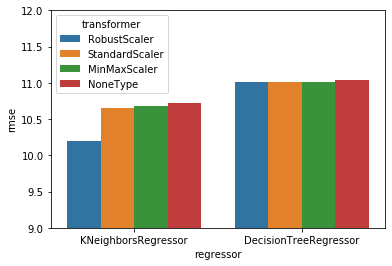

In [18]:
sns.barplot(
    data=results,
    x="regressor",
    y="rmse",
    hue="transformer"
)
plt.ylim([9,12])